In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_csv('prices.csv')
prices['Price'].dropna(inplace=True)
prices


/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Date,Price
0,3/1/2023,18.922450
1,4/1/2023,19.223260
2,5/1/2023,19.350550
3,6/1/2023,19.337800
4,9/1/2023,19.449920
...,...,...
208,20/10/2023,20.449596
209,23/10/2023,20.479643
210,24/10/2023,20.495601
211,25/10/2023,20.495365


1.  Visualize the data 

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


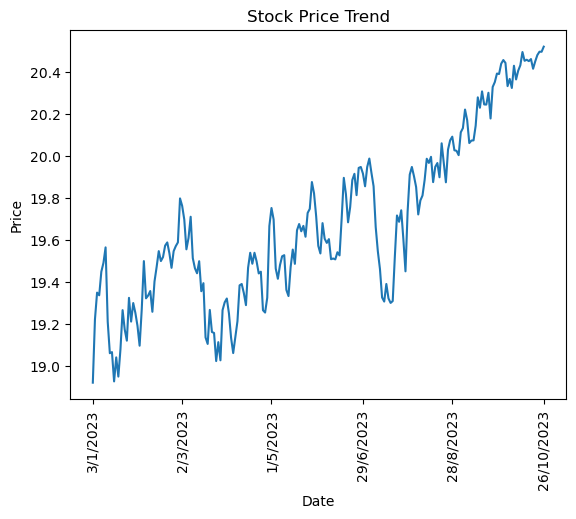

In [2]:
date = prices['Date']
price = prices['Price']
sns.lineplot(x=date, y=price)
# positions =[0,30,60,90,120,150,180,210]
positions = np.linspace(0, len(prices)-1, 6, dtype=int)
x_labels = [date[pos] for pos in positions]
# x_labels = ['3/1/2023','3/2/2023','3/3/2023','3/4/2023','3/5/2023','3/6/2023','3/7/2023','3/8/2023','3/9/2023','3/10/2023']
plt.xticks( positions,x_labels,rotation=90, fontsize=10)
plt.title('Stock Price Trend')
# plt.tight_layout()
plt.show()


First Method - Use interval max/min

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


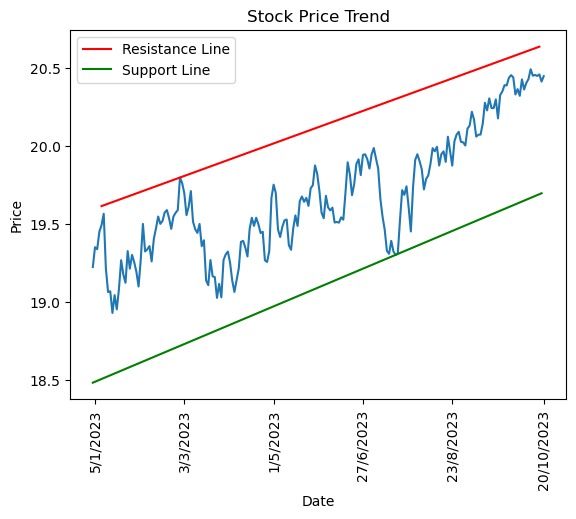

0.005906693497029799 0.005095044115081676


In [3]:
def Trend_Channel(sub_prices):
    interval = 5
    max_interval_prices = np.array([])
    min_interval_prices = np.array([])
    max_interval_indexes = np.array([])
    min_interval_indexes = np.array([])
    for i in range(0, len(sub_prices), interval):
        min_interval_prices = np.append(min_interval_prices, sub_prices['Price'].iloc[i:i+interval].min())
        min_interval_indexes = np.append(min_interval_indexes, sub_prices['Price'].iloc[i:i+interval].idxmin())
        max_interval_prices = np.append(max_interval_prices, sub_prices['Price'].iloc[i:i+interval].max())
        max_interval_indexes = np.append(max_interval_indexes, sub_prices['Price'].iloc[i:i+interval].idxmax())
    slope_min, inter_min = np.polyfit(min_interval_indexes,min_interval_prices ,1)
    slope_max, inter_max = np.polyfit(max_interval_indexes, max_interval_prices,1)
    
        
    return slope_min, slope_max, min_interval_indexes, max_interval_indexes

start_date = '4/1/2023'
end_date = '20/10/2023'
start_date_index = prices[prices['Date'] == start_date ].index[0]
end_date_index = prices[prices['Date'] == end_date ].index[0]
sub_prices = prices.iloc[start_date_index:end_date_index+1]
sub_prices.reset_index(inplace=True,drop=True)
date = sub_prices['Date']
price = sub_prices['Price']

slope_min, slope_max, min_interval_indexes, max_interval_indexes = Trend_Channel(sub_prices)
adj_max_inter = (sub_prices['Price'].iloc[max_interval_indexes] - slope_max * max_interval_indexes).max()
adj_min_inter = (sub_prices['Price'].iloc[min_interval_indexes] - slope_min * min_interval_indexes).min()

sns.lineplot(x=date, y=price)
positions = np.linspace(start_date_index, end_date_index-1, 6, dtype=int)
# positions =[0,30,60,90,120,150,180]
x_labels = [date[pos] for pos in positions]
plt.xticks( positions,x_labels,rotation=90, fontsize=10)
plt.title('Stock Price Trend')
plt.plot(max_interval_indexes, slope_max*max_interval_indexes + adj_max_inter, label='Resistance Line', color='red')
plt.plot(min_interval_indexes, slope_min*min_interval_indexes + adj_min_inter, label='Support Line', color='green')
plt.legend()
plt.show()
print(slope_min,slope_max)

Second method - Use turn point 

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


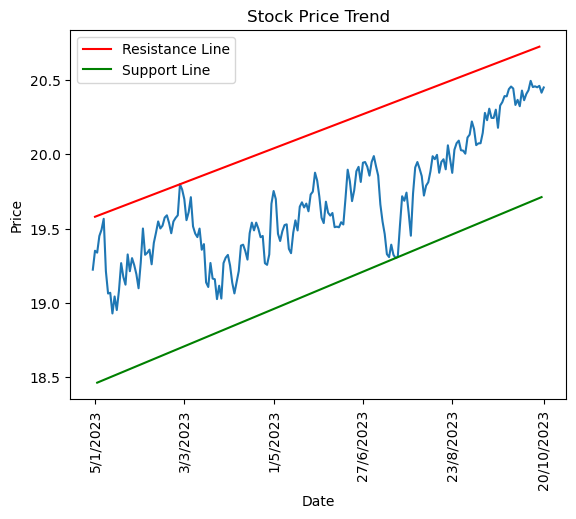

0.006123243866702315 0.005612253535924529


In [4]:
def Trend_Channel_2(sub_prices):
    max_interval_prices = np.array([])
    min_interval_prices = np.array([])
    max_interval_indexes = np.array([])
    min_interval_indexes = np.array([])
    for i in range(1, len(sub_prices)-1):
        if sub_prices['Price'].iloc[i-1] > sub_prices['Price'].iloc[i] < sub_prices['Price'].iloc[i+1]:
            min_interval_prices = np.append(min_interval_prices, sub_prices['Price'].iloc[i])
            min_interval_indexes = np.append(min_interval_indexes, i)
        elif sub_prices['Price'].iloc[i-1] < sub_prices['Price'].iloc[i] > sub_prices['Price'].iloc[i+1]:
            max_interval_prices = np.append(max_interval_prices, sub_prices['Price'].iloc[i])
            max_interval_indexes = np.append(max_interval_indexes, i)
    slope_min, inter_min = np.polyfit(min_interval_indexes,min_interval_prices ,1)
    slope_max, inter_max = np.polyfit(max_interval_indexes, max_interval_prices,1)
    
        
    return slope_min, slope_max, min_interval_indexes, max_interval_indexes

start_date = '4/1/2023'
end_date = '20/10/2023'
start_date_index = prices[prices['Date'] == start_date ].index[0]
end_date_index = prices[prices['Date'] == end_date ].index[0]
sub_prices = prices.iloc[start_date_index:end_date_index+1]
sub_prices.reset_index(inplace=True,drop=True)
date = sub_prices['Date']
price = sub_prices['Price']

slope_min, slope_max, min_interval_indexes, max_interval_indexes = Trend_Channel_2(sub_prices)
adj_max_inter = (sub_prices['Price'].iloc[max_interval_indexes] - slope_max * max_interval_indexes).max()
adj_min_inter = (sub_prices['Price'].iloc[min_interval_indexes] - slope_min * min_interval_indexes).min()

sns.lineplot(x=date, y=price)
postions = np.linspace(start_date_index, end_date_index-1, 6, dtype=int)
# positions =[0,30,60,90,120,150,180]
x_labels = [date[pos] for pos in positions]
plt.xticks( positions,x_labels,rotation=90, fontsize=10)
plt.title('Stock Price Trend')
plt.plot(max_interval_indexes, slope_max*max_interval_indexes + adj_max_inter, label='Resistance Line', color='red')
plt.plot(min_interval_indexes, slope_min*min_interval_indexes + adj_min_inter, label='Support Line', color='green')
plt.legend()
plt.show()
print(slope_min,slope_max)

Multiple Trend Channel - Method 1

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


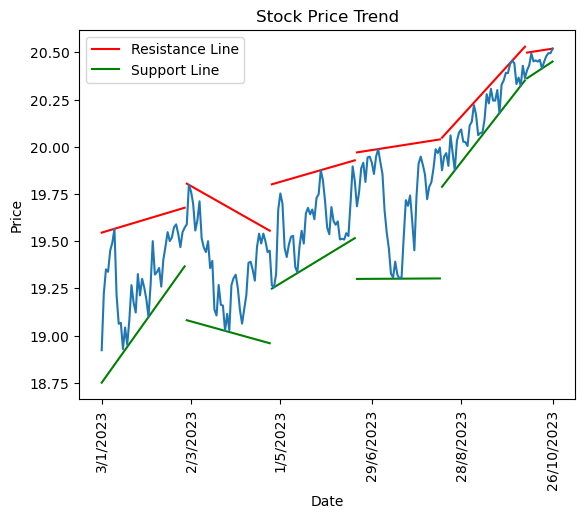

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

trend_window = 40
for i in range(0, len(prices), trend_window):
    start_date_index = i
    end_date_index = min(i + trend_window, len(prices))  # Ensure not to go beyond the DataFrame
    sub_prices = prices.iloc[start_date_index:end_date_index]
    sub_prices.reset_index(inplace=True, drop=True)
    
    # Assuming Trend_Channel function is correctly defined
    slope_min, slope_max, min_interval_indexes, max_interval_indexes = Trend_Channel(sub_prices)
    # print(slope_min, slope_max)
    # print(min_interval_indexes, max_interval_indexes)
    
    # Adjusting intercepts
    adj_max_inter = (sub_prices['Price'].iloc[max_interval_indexes] - slope_max * max_interval_indexes).max()
    adj_min_inter = (sub_prices['Price'].iloc[min_interval_indexes] - slope_min * min_interval_indexes).min()
    
    # Plotting the trend lines for each window
 
    plt.plot(sub_prices.index+start_date_index, slope_max * sub_prices.index + adj_max_inter, color='red')
    plt.plot(sub_prices.index+start_date_index, slope_min * sub_prices.index + adj_min_inter, color='green')

# Plot the main stock price data
sns.lineplot(x=prices['Date'], y=prices['Price'], label='Stock Price')

# Set x-ticks and labels
positions = np.linspace(0, len(prices)-1, 6, dtype=int)
x_labels = [prices['Date'].iloc[pos] for pos in positions]
plt.xticks(positions, x_labels, rotation=90, fontsize=10)

# Add title and legend
plt.title('Stock Price Trend')
plt.legend(['Resistance Line', 'Support Line'])

plt.show()


Multiple Trend Channel - Method 2: Smoothing

Part 1. Smoothing the price line

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

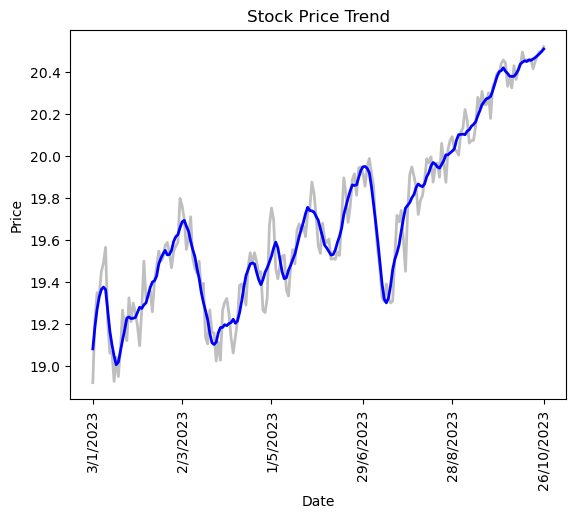

In [6]:
import matplotlib. pyplot as plt
from scipy. signal import savgol_filter
from scipy. signal import find_peaks
date = prices['Date']
price = prices['Price']
sns.lineplot(x=date, y=price, c= 'grey', lw=2 , alpha= 0.5, zorder= 5)
positions = np.linspace(0, len(prices)-1, 6, dtype=int)
x_labels = [date[pos] for pos in positions]
plt.xticks( positions,x_labels,rotation=90, fontsize=10)
plt.title('Stock Price Trend')

prices['Smooth_Price'] = savgol_filter(prices['Price'],13,2)
sns.lineplot(x=date, y=prices['Smooth_Price'], c='b', lw=2, zorder =5)
plt.show()




Part 2. Find the turning points

/var/folders/sh/2jszryds3px2hchfyj62nb1w0000gn/T/ipykernel_89720/423685461.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prices['abs_diff'].iloc[0] = prices['abs_diff'].iloc[1]
/var/folders/sh/2jszryds3px2hchfyj62nb1w0000gn/T/ipykernel

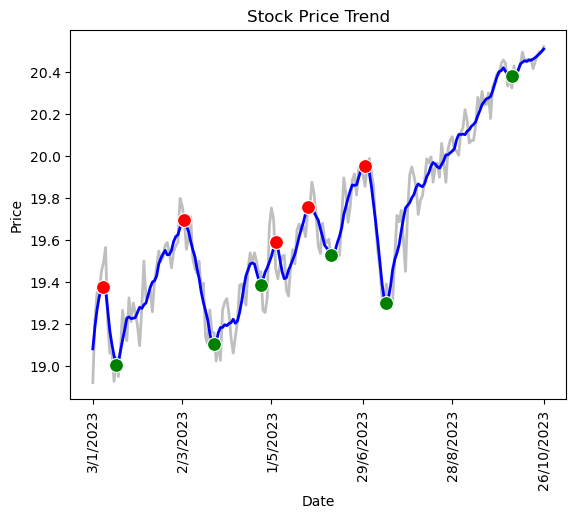

In [7]:
prices['abs_diff'] = 0  # This initializes the column with zeros
prices['abs_diff'] = abs(prices['Price'] - prices['Price'].shift(1))
# Handle the first element by forward-filling the second value
prices['abs_diff'].iloc[0] = prices['abs_diff'].iloc[1]



diff = prices['abs_diff'].iloc[-1] 
peaks_idx,_ = find_peaks(prices['Smooth_Price'], distance = 15, width = 3, prominence = diff)
troughs_idx,_ = find_peaks(-1* prices['Smooth_Price'], distance = 15, width = 3, prominence = diff)
sns.lineplot(x=date, y=price, c= 'grey', lw=2 , alpha= 0.5, zorder= 5)
positions = np.linspace(0, len(prices)-1, 6, dtype=int)
x_labels = [date[pos] for pos in positions]
plt.xticks( positions,x_labels,rotation=90, fontsize=10)
plt.title('Stock Price Trend')
prices['Smooth_Price'] = savgol_filter(prices['Price'],13,2)
sns.lineplot(x=date, y=prices['Smooth_Price'], c='b', lw=2, zorder =5)
sns.scatterplot(x=prices.index[peaks_idx], y= prices['Smooth_Price'].iloc[peaks_idx],c="r", s=100, marker='o', zorder=10)
sns.scatterplot(x=prices.index[troughs_idx], y=prices['Smooth_Price'].iloc[troughs_idx],c='g', s=100, marker='o', zorder=10)

plt.show()

Part 3 - Determine the trend plot the Trend Channel

/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhangsiwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

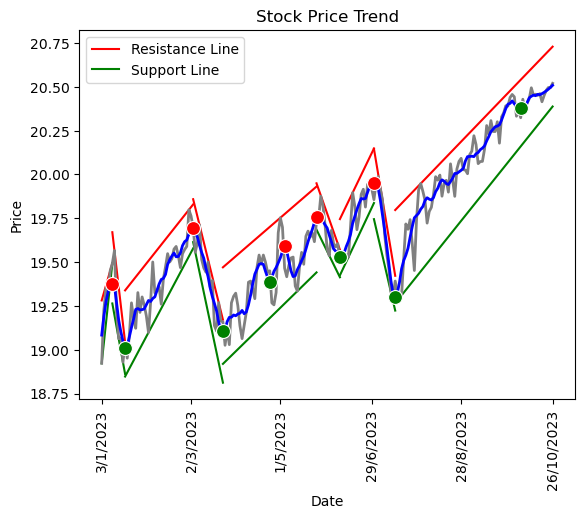

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#determine the trend
turn_idx = np.append(np.append(peaks_idx, troughs_idx), [0, len(prices)-1])
turn_idx.sort()
turn_idx = list(turn_idx)
up_trend = prices['Smooth_Price'].iloc[turn_idx[0]] < prices['Smooth_Price'].iloc[turn_idx[1]]
down_trend = prices['Smooth_Price'].iloc[turn_idx[0]] > prices['Smooth_Price'].iloc[turn_idx[1]]
cur_trend_pair = [up_trend,down_trend]
pre_trend_pair = []
remove_list = []
for i in range(1, len(turn_idx)-1):
    pre_trend_pair = cur_trend_pair
    up_trend = prices['Smooth_Price'].iloc[turn_idx[i]] < prices['Smooth_Price'].iloc[turn_idx[i+1]]
    down_trend = prices['Smooth_Price'].iloc[turn_idx[i]] > prices['Smooth_Price'].iloc[turn_idx[i+1]]
    cur_trend_pair = [up_trend,down_trend]
    if pre_trend_pair == cur_trend_pair:
        remove_list.append(turn_idx[i])
for j in remove_list:
    turn_idx.remove(j)
turn_idx = np.array(turn_idx)

# plotting the multiple trending channels
for i in range(len(turn_idx)-1):
    start_date_index = turn_idx[i]

    end_date_index = turn_idx[i+1]   # Ensure not to go beyond the DataFrame
    sub_prices = prices.iloc[start_date_index:end_date_index+1]
    sub_prices.reset_index(inplace=True, drop=True)
    slope_min, slope_max, min_interval_indexes, max_interval_indexes = Trend_Channel(sub_prices)
    date_index_array = np.arange(0, end_date_index-start_date_index+1)
    adj_max_inter = (sub_prices['Price'] - slope_max * date_index_array).max()
    adj_min_inter = (sub_prices['Price'] - slope_min * date_index_array).min()
    
    plt.plot(sub_prices.index+start_date_index, slope_max * sub_prices.index + adj_max_inter, color='red')
    plt.plot(sub_prices.index+start_date_index, slope_min * sub_prices.index + adj_min_inter, color='green')

#add prices line
sns.lineplot(x=prices['Date'], y=prices['Price'], label='Stock Price', c='grey', lw =2 , zorder =5)

#add smooth prices line
prices['Smooth_Price'] = savgol_filter(prices['Price'],13,2)
sns.lineplot(x=date, y=prices['Smooth_Price'], c='b', lw=2, zorder =5)
#add turining points
sns.scatterplot(x=prices.index[peaks_idx], y= prices['Smooth_Price'].iloc[peaks_idx],c="r", s=100, marker='o', zorder=10)
sns.scatterplot(x=prices.index[troughs_idx], y=prices['Smooth_Price'].iloc[troughs_idx],c='g', s=100, marker='o', zorder=10)
#add titile and legend
plt.title('Stock Price Trend')
plt.legend(['Resistance Line', 'Support Line'])
# Set x-ticks and labels
positions = np.linspace(0, len(prices)-1, 6, dtype=int)
x_labels = [prices['Date'].iloc[pos] for pos in positions]
plt.xticks(positions, x_labels, rotation=90, fontsize=10)

plt.show()